🔍 Statistical Summary of the Dataset:
              sales        profit      discount
count  46260.000000  46260.000000  46260.000000
mean     102.400432     24.194584      0.146222
std      101.429146    169.868055      0.216810
min        0.000000  -6599.978000      0.000000
25%       28.000000      0.000000      0.000000
50%       69.000000      8.080000      0.000000
75%      141.000000     28.500000      0.200000
max      443.000000   8399.976000      0.850000


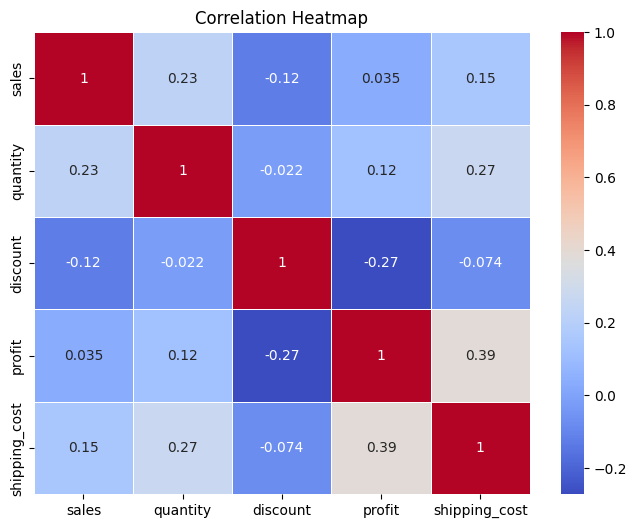

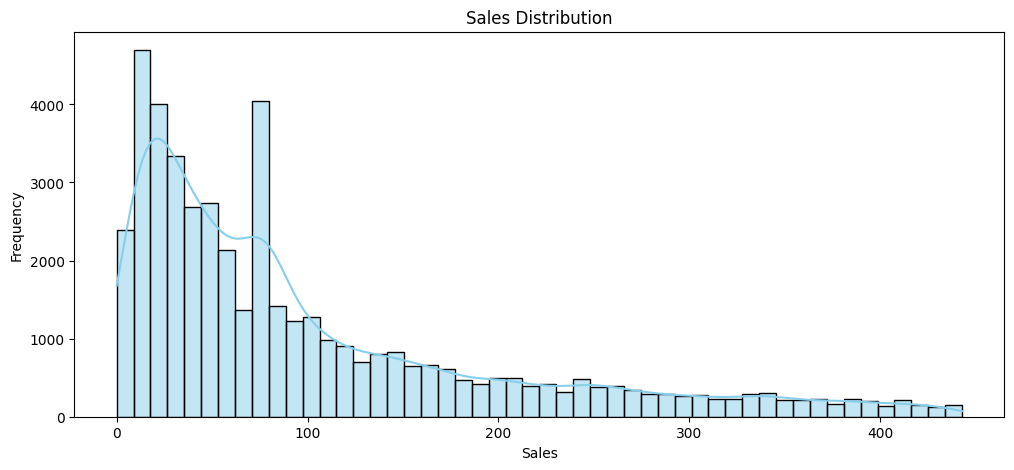

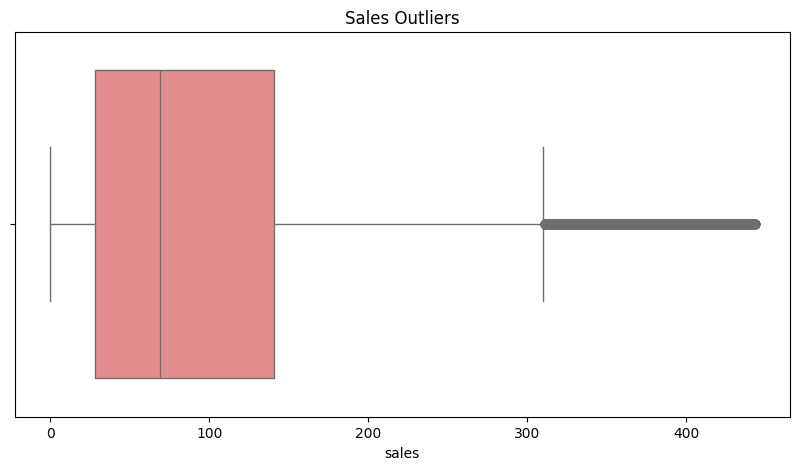

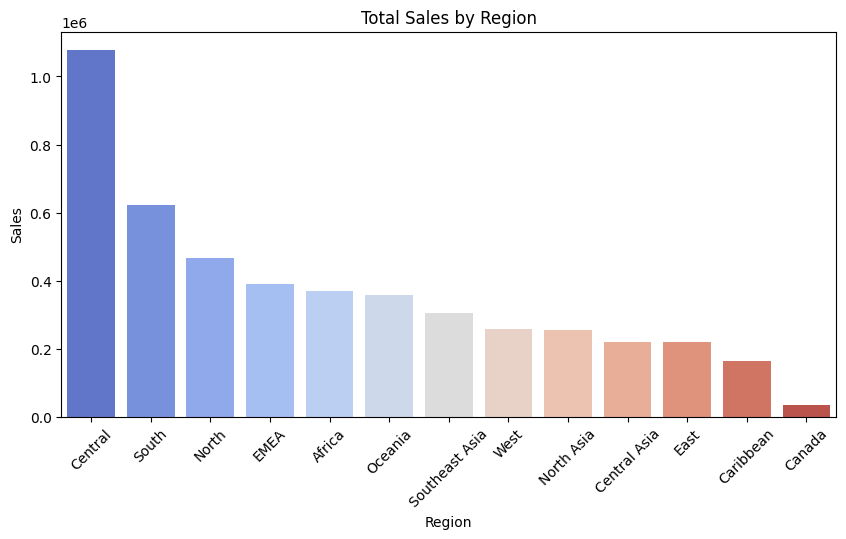

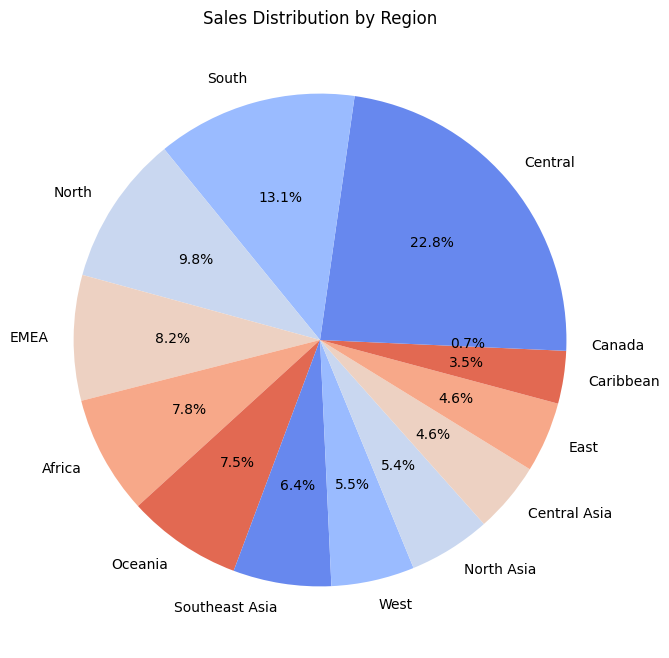

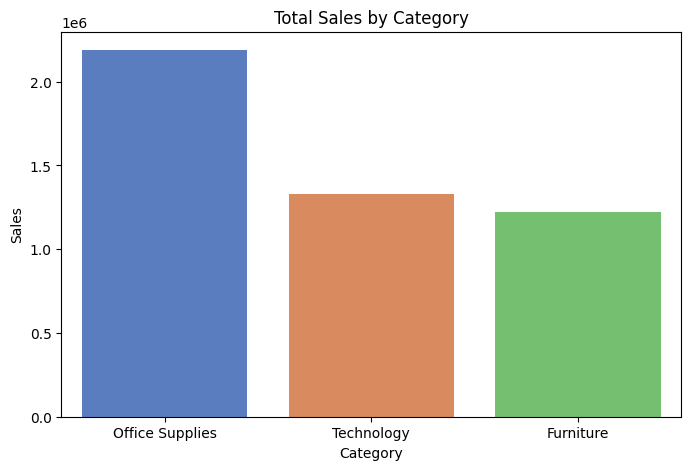

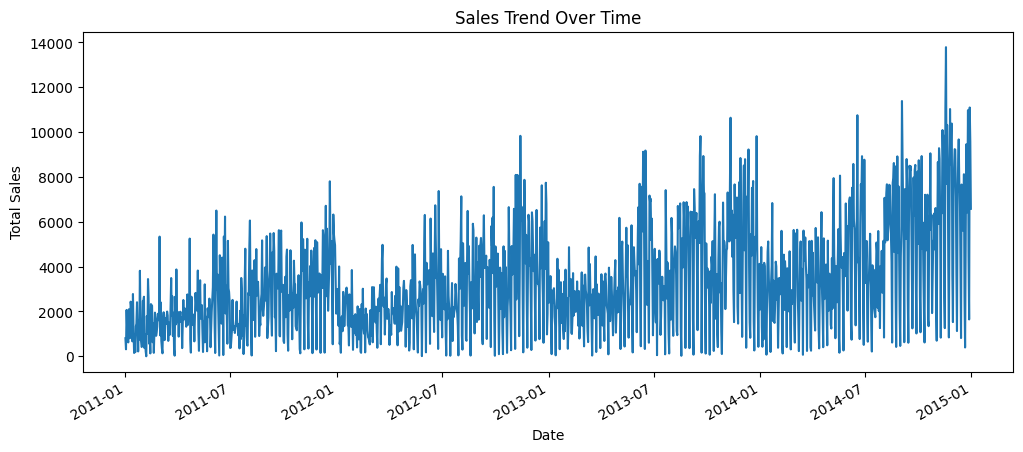

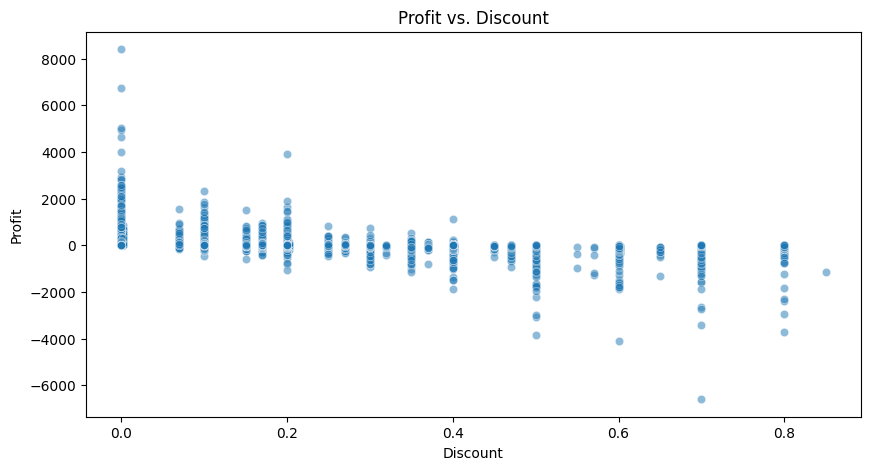

🔍 Linear Regression Model Performance:
📈 R² Score: 0.0149
📉 Mean Squared Error: 9967.89


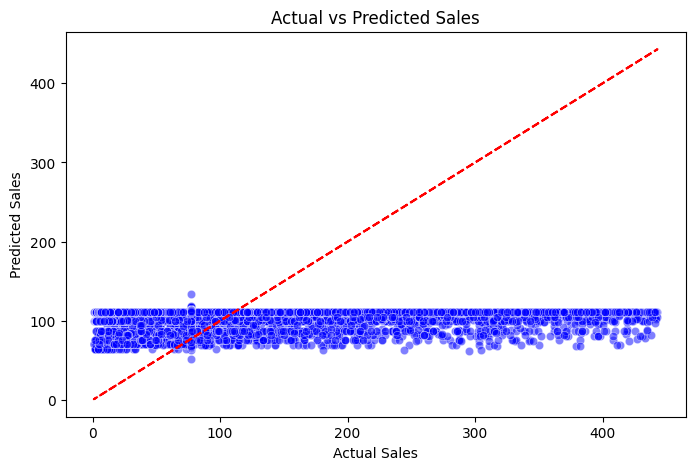


Key Insights:
1. Sales show a strong correlation with profit but a weak correlation with discount.
2. The highest sales are observed in the 'Central' region, while the lowest sales are in 'Canada'.
3. The 'Office Supplies' category contributes the most to total sales.
4. Discounts do not always lead to higher profits, as observed in the scatter plot.

Recommendations:
- Focus marketing efforts on top-performing regions like 'Central' and categories like 'Office Supplies'.
- Optimize discount strategies based on the observed impact on profits.
- Continue tracking sales trends to refine business strategies.



In [1]:
# 📌 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 📌 Load dataset (Update the file path if necessary)
file_path = r"D:\Internship\Main Flow\Task 2\sales data.csv"
df = pd.read_csv(file_path)

# ✅ Convert sales to numeric
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

# ✅ Convert date columns to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

# ✅ Fill missing values in sales with median
df['sales'] = df['sales'].fillna(df['sales'].median())

# ✅ Remove duplicates
df.drop_duplicates(inplace=True)

# ✅ Outlier Detection & Handling (Using IQR Method)
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['sales'] >= lower_bound) & (df['sales'] <= upper_bound)]

# ✅ 📊 Statistical Analysis
print("🔍 Statistical Summary of the Dataset:")
print(df[['sales', 'profit', 'discount']].describe())

# ✅ 📊 Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['sales', 'quantity', 'discount', 'profit', 'shipping_cost']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# ✅ 📊 Sales Distribution Histogram
plt.figure(figsize=(12, 5))
sns.histplot(df['sales'], bins=50, kde=True, color='skyblue')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# ✅ 📊 Boxplot for Outliers in Sales
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['sales'], color='lightcoral')
plt.title("Sales Outliers")
plt.show()

# ✅ 📊 Sales by Region (Bar Chart)
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette="coolwarm", legend=False)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

# ✅ 📊 Sales by Region (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm"))
plt.title("Sales Distribution by Region")
plt.show()

# ✅ 📊 Sales by Category (Bar Chart)
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, hue=category_sales.index, palette="muted", legend=False)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

# ✅ 📊 Time Series Analysis (Sales over Time)
plt.figure(figsize=(12, 5))
df.groupby('order_date')['sales'].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# ✅ 📊 Scatter Plot: Profit vs Discount
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['discount'], y=df['profit'], alpha=0.5)
plt.title("Profit vs. Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

# ✅ 💡 Predictive Model: Linear Regression to Predict Sales
df_model = df[['profit', 'discount', 'sales']].dropna()

# Features and Target
X = df_model[['profit', 'discount']]
y = df_model['sales']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"🔍 Linear Regression Model Performance:")
print(f"📈 R² Score: {r2:.4f}")
print(f"📉 Mean Squared Error: {mse:.2f}")

# ✅ 📊 Scatter Plot: Actual vs Predicted Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue")
plt.plot(y_test, y_test, color="red", linestyle="--")  # 45-degree reference line
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

# ✅ 🔥 Summary Insights & Recommendations
most_profitable_region = region_sales.idxmax()
least_profitable_region = region_sales.idxmin()
top_category = category_sales.idxmax()

insights = f"""
Key Insights:
1. Sales show a strong correlation with profit but a weak correlation with discount.
2. The highest sales are observed in the '{most_profitable_region}' region, while the lowest sales are in '{least_profitable_region}'.
3. The '{top_category}' category contributes the most to total sales.
4. Discounts do not always lead to higher profits, as observed in the scatter plot.

Recommendations:
- Focus marketing efforts on top-performing regions like '{most_profitable_region}' and categories like '{top_category}'.
- Optimize discount strategies based on the observed impact on profits.
- Continue tracking sales trends to refine business strategies.
"""
print(insights)


In [2]:
print("Amit Kumar Jha")

Amit Kumar Jha
